In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
dataset = pd.read_csv("/Users/mohit.k.bansal/Downloads/Machine Learning A-Z Template Folder/Part 2 - Regression/Section 5 - Multiple Linear Regression/Multiple_Linear_Regression/50_Startups.csv")

In [3]:
#dataset information
#print(dataset.describe()) # try to find the data spread just by looking at min, max, mean and std
print(dataset.info())
#print(dataset)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
R&D Spend          50 non-null float64
Administration     50 non-null float64
Marketing Spend    50 non-null float64
State              50 non-null object
Profit             50 non-null float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB
None


In [4]:
#Creating Numpy Array
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

#Creating subset dataframe from superset dataframe.

y_df=dataset.iloc[:,-1]
X_df= dataset.iloc[:,:-1]
print(X_df.columns)


Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State'], dtype='object')


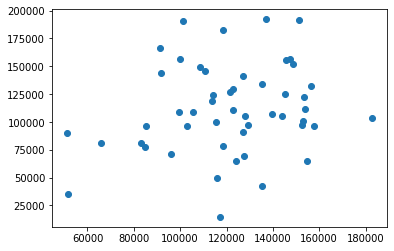

In [5]:
#Data Check 
#Checking Linearity - Plot the scatter graph for all independent variable against dependent variable. All the graph shows some leve
#                      of linearity between Indepdent and Dependent variable.

#fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, sharey='all', figsize = (12, 8))
plt.scatter(X_df['Administration'], y) # Very low linearity
#plt.plot(X_df['R&D Spend'], y)
#plt.scatter(X_df['Administration'], y)
#plt.scatter(X_df['Marketing Spend'], y)
#plt.scatter(X_df['State'], y)

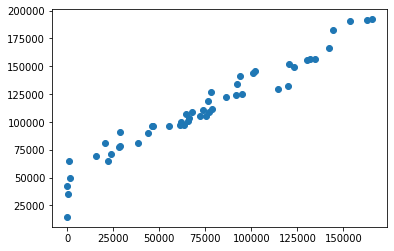

In [6]:
plt.scatter(X_df['R&D Spend'], y) # very high linearity


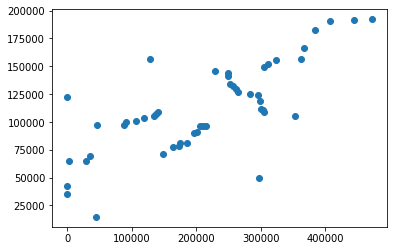

In [7]:
plt.scatter(X_df['Marketing Spend'], y) # somewhat linear.


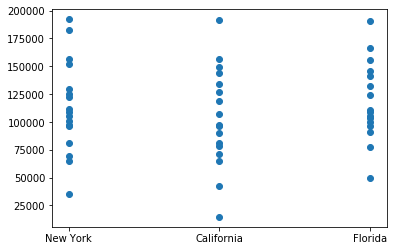

In [8]:
plt.scatter(X_df['State'], y) # Graph clearly shows categorical features.


In [9]:
#def scatterPlot_fn(X, y, X_column_name, y_column_name):
#    fig = plt.subplot(4,1)
#    plt.scatter(X, y, color='red')
#    plt.plot(X, y, color='blue')
#    plt.title("{} vs {}".format(X_column_name, y_column_name))
#    plt.xlabel("{}".format(X_column_name))
#    plt.ylabel("{}".format(y_column_name))

(array([6., 6., 4., 7., 8., 5., 3., 5., 3., 3.]),
 array([0.0, 16534.920000000002, 33069.840000000004, 49604.76000000001,
        66139.68000000001, 82674.6, 99209.52000000002, 115744.44000000002,
        132279.36000000002, 148814.28000000003, 165349.2], dtype=object),
 <a list of 10 Patch objects>)

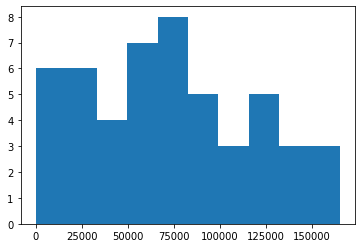

In [10]:
plt.hist(X[:, 0])

                 R&D Spend  Administration  Marketing Spend    Profit
R&D Spend         1.000000        0.241955         0.724248  0.972900
Administration    0.241955        1.000000        -0.032154  0.200717
Marketing Spend   0.724248       -0.032154         1.000000  0.747766
Profit            0.972900        0.200717         0.747766  1.000000


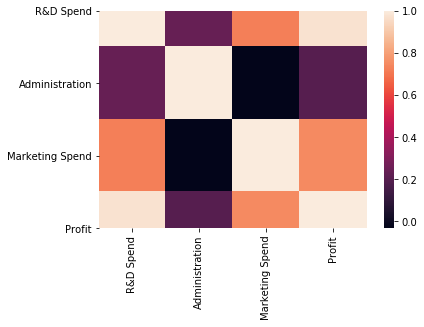

In [11]:
# Selecting features based on co-relation
corr = dataset.corr()
sns.heatmap(corr)
print(corr)

#Quite evident from co-relation matrix which feature can be eliminated from the list.

In [12]:
#print(X)
range(0, 3)
X[:, 0]

array([165349.2, 162597.7, 153441.51, 144372.41, 142107.34, 131876.9,
       134615.46, 130298.13, 120542.52, 123334.88, 101913.08, 100671.96,
       93863.75, 91992.39, 119943.24, 114523.61, 78013.11, 94657.16,
       91749.16, 86419.7, 76253.86, 78389.47, 73994.56, 67532.53,
       77044.01, 64664.71, 75328.87, 72107.6, 66051.52, 65605.48,
       61994.48, 61136.38, 63408.86, 55493.95, 46426.07, 46014.02,
       28663.76, 44069.95, 20229.59, 38558.51, 28754.33, 27892.92,
       23640.93, 15505.73, 22177.74, 1000.23, 1315.46, 0.0, 542.05, 0.0],
      dtype=object)

In [13]:
# Let's try to find a p value which also helps establish a linearly sensitive relationship between independent and dependent variables.
#import statsmodels.api as sm
#X_sm = X[:,0:3]
#print(len(X_sm[0]))
#print(X_sm)
#print(y.shape)
#for i in range(0, len(X_sm[0])):
    #X_sm = sm.add_constant(X_sm)
    #regressor = sm.OLS(y, X_sm[:,i]).fit()
    
    
import statsmodels.formula.api as sm
X_sm = X[:,0:3]
i = 'Administration'
result = sm.ols('{} ~ Profit'.format(i), data=dataset).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:         Administration   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Tue, 07 Jan 2020   Prob (F-statistic):              0.162
Time:                        10:40:54   Log-Likelihood:                -581.44
No. Observations:                  50   AIC:                             1167.
Df Residuals:                      48   BIC:                             1171.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.057e+05   1.17e+04      9.045      0.0

In [14]:
intercept, profit = result.pvalues # this feature cannot be ignored in model training.
if intercept > 0.05:
    print("yay")
else:
    print("nay")

nay


In [15]:
import statsmodels.formula.api as sm
dataset2 = dataset.copy()
print(dataset2.columns)
dataset2 = dataset2.rename(columns={"R&D Spend": "R&D_Spend", "Marketing Spend": "Marketing_Spend"})
result = sm.ols('Marketing_Spend ~ Profit', data=dataset2).fit()
print(result.pvalues)

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')
Intercept    2.185617e-01
Profit       4.381073e-10
dtype: float64


In [16]:
intercept, profit = result.pvalues 
if intercept > 0.05:
    print("yay")
    print("{:.2f}".format(intercept))
else:
    print("nay")

yay
0.22


In [17]:
import statsmodels.formula.api as sm
dataset2 = dataset2.rename(columns={"R&D_Spend": "RD_Spend"})
print(dataset2.columns)
result = sm.ols('RD_Spend ~ Profit', data=dataset2).fit()
print(result.pvalues)

Index(['RD_Spend', 'Administration', 'Marketing_Spend', 'State', 'Profit'], dtype='object')
Intercept    6.397136e-15
Profit       3.500322e-32
dtype: float64


In [18]:
# since pvalues are lower than significance level (0.05) , we can reject null hypothesis which says that feature has no impact to dependent variable.
intercept, profit = result.pvalues
if intercept > 0.05:
    print("yay")
else:
    print("nay")

nay


In [19]:
import statsmodels.api as sm
Y = [1,3,4,5,2,3,4]
Xz = range(1,8)
print(Y)
Xz = sm.add_constant(Xz)
model = sm.OLS(Y,Xz)
results = model.fit()
results.params
print(len(X[0]))

[1, 3, 4, 5, 2, 3, 4]
4


In [20]:
#Pre processing categorical features using numpy array.
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
encoder_X = LabelEncoder()
X[:, 3] = encoder_X.fit_transform(X[:, 3])
hencoder_X = OneHotEncoder(categorical_features=[3])
X = hencoder_X.fit_transform(X).toarray()

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [21]:
#Preprocessing categorical features using sklearn when the input is dataframe -

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
encoder_X_df = LabelEncoder()
X_df.iloc[:, 3] = encoder_X.fit_transform(X_df.iloc[:, 3])
hencoder_X_df = OneHotEncoder(categorical_features=[3])
X_df = hencoder_X_df.fit_transform(X_df)

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [22]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [23]:
SelectKBest.fit?


In [24]:
#print(dataset2.columns)
X_df_new = dataset2.iloc[:,0:3]
y_df_new = dataset2.iloc[:,-1]
#y_df_new = pd.DataFrame(y_df_new, columns = 'Profits') # this step is to add a column name to pandas dataframe.
print(y_df_new.shape)
print(X_df_new.shape)
print(type(X_df_new))
print(type(y_df_new))

#y_df_new = pd.Series(y_df_new).array
#print(type(y_df_new))

#However to add column name and to create dataframe from pandas series we have to create a tuple first.
#frame = {'Profites': y_df_new}
#y_df_latest = pd.DataFrame(frame)
#print(type(y_df_latest))
#print(y_df_latest.columns) # technique worked but still getting the error.
#print(X_df_new)
#print(y_df_new)


# As it turns out, this test only takes real number (array like) as input for y.
y_df_new = y_df_new.astype('int')

#result = SelectKBest(score_func=chi2, k=3).fit(X_df_new, y_df_new)
bestfeatures = SelectKBest(score_func=chi2, k=3)
result = bestfeatures.fit(X_df_new, y_df_new)
dfscores = pd.DataFrame(result.scores_)
dfcolumns = pd.DataFrame(X_df_new.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

(50,)
(50, 3)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
             Specs         Score
2  Marketing_Spend  3.472530e+06
0         RD_Spend  1.400455e+06
1   Administration  3.169886e+05


In [25]:
result.scores_

array([1400455.47724282,  316988.59066065, 3472530.48292991])

In [26]:
X_df_new.columns

Index(['RD_Spend', 'Administration', 'Marketing_Spend'], dtype='object')

[0.36938776 0.31632653 0.31428571]


/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


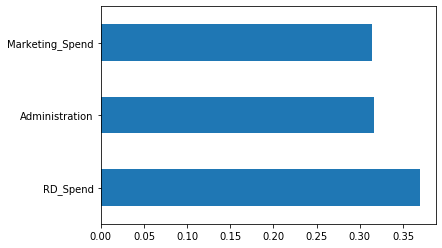

In [27]:
# Another method to find feature importance -

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X_df_new,y_df_new)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X_df_new.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [28]:
# Now as we are done checking feature importance let's do some preprocessing of the data before we feed it to our linear regressio model
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
X[:,3] = labelencoder_X.fit_transform(X[:,3])
from sklearn.preprocessing import OneHotEncoder
onehotencoder_X = OneHotEncoder(categorical_features=[3])
X = onehotencoder_X.fit_transform(X).toarray()

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [29]:
X

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        1.3689780e+05, 4.7178410e+05],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.5137759e+05, 4.4389853e+05],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.0114555e+05, 4.0793454e+05],
       ...,
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.3542692e+05, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        5.1743150e+04, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.1698380e+05, 4.5173060e+04]])

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42 )

In [31]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor_fit = regressor.fit(X_train, y_train)

In [32]:
y_pred = regressor_fit.predict(X_test)

In [33]:
y_actual = np.c_[y_pred, y_test]

In [34]:
y_actual

array([[139923.58988759, 134307.35      ],
       [ 45175.95601534,  81005.76      ],
       [ 99424.12157665,  99937.59      ],
       [106497.86341496,  64926.08      ],
       [162857.59410985, 125370.37      ],
       [-16311.85710156,  35673.41      ],
       [150894.0741654 , 105733.54      ],
       [138252.15379169, 107404.34      ],
       [113900.80700396,  97427.84      ],
       [156095.89381157, 122776.86      ]])

In [35]:
from sklearn import metrics
print(metrics.mean_squared_error(y_test, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1152413191.514037
33947.21183711612


In [36]:
# Dropping one categorical feature to avoid dummy variable trap
X_train = X_train[:, 1:]
X_test = X_test[:, 1:]

In [37]:
regressor = LinearRegression()
regressor_fit = regressor.fit(X_train, y_train)
y_pred = regressor_fit.predict(X_test)
y_actual = np.c_[y_pred, y_test]
y_actual

array([[107425.78134472, 134307.35      ],
       [-24792.45483306,  81005.76      ],
       [ 64554.6877853 ,  99937.59      ],
       [ 61754.44341538,  64926.08      ],
       [178405.47855568, 125370.37      ],
       [-93616.44890764,  35673.41      ],
       [136497.92429441, 105733.54      ],
       [ 86724.88020574, 107404.34      ],
       [ 41087.19285106,  97427.84      ],
       [124069.44867634, 122776.86      ]])

In [38]:
print(metrics.mean_squared_error(y_test, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

3725650710.3904715
61038.1086731107


In [39]:
# Now try dropping administration based on co-relation metrics

print(np.delete(X_train, 3, 1))

[[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  1.2732038e+05 2.4983944e+05]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  9.1391770e+04 3.6616842e+05]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  5.1283140e+04 1.9702942e+05]
 ...
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  1.5654742e+05 2.5651292e+05]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  1.8264556e+05 1.1814820e+05]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.0000000e+00
  6.5947930e+04 1.8526510e+05]]


In [40]:
X_train = np.delete(X_train, 3, 1)
X_test = np.delete(X_test, 3, 1)

In [41]:
regressor4 = LinearRegression()
regressor_fit2 = regressor4.fit(X_train, y_train)
y_pred = regressor_fit2.predict(X_test)
y_actual = np.c_[y_pred, y_test]
y_actual

array([[ 110908.87274656,  134307.35      ],
       [ -24151.23276083,   81005.76      ],
       [  61938.54832591,   99937.59      ],
       [  53664.99097736,   64926.08      ],
       [ 174888.67762474,  125370.37      ],
       [-104175.42690089,   35673.41      ],
       [ 135434.53270272,  105733.54      ],
       [  88764.72677283,  107404.34      ],
       [  41512.6271893 ,   97427.84      ],
       [ 116944.4850735 ,  122776.86      ]])

In [42]:
print(metrics.mean_squared_error(y_test, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

3957609290.0691223
62909.53258504726


In [43]:
# Now Trying deleting the Marketing Spend feature which couldn't reject the pvalue hypothesis.

# first avoiding dummy variable trap as X_train and test variables were reset.
X_train = np.delete(X_train, 0 , 1)
X_test = np.delete(X_test, 0, 1)

# Now Deleting the feature
X_train = np.delete(X_train, 4, 1)
X_test = np.delete(X_test, 4, 1)


In [44]:
regressor5 = LinearRegression()
regressor_fit3 = regressor5.fit(X_train, y_train)
y_pred = regressor_fit3.predict(X_test)
y_actual = np.c_[y_pred, y_test]
y_actual

array([[ 472599.38582643,  134307.35      ],
       [  42434.42650672,   81005.76      ],
       [-191985.23333649,   99937.59      ],
       [  -5759.96995559,   64926.08      ],
       [ 590296.12778054,  125370.37      ],
       [-420040.3561362 ,   35673.41      ],
       [  42750.8989865 ,  105733.54      ],
       [ 300586.08497747,  107404.34      ],
       [  85690.49862159,   97427.84      ],
       [ 157673.79520051,  122776.86      ]])

In [45]:
print(metrics.mean_squared_error(y_test, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

67261725953.85526
259348.65712753413


In [46]:
metrics.adjusted_rand_score(y_test, y_pred)

1.0

In [47]:
metrics.r2_score(y_test, y_pred)

-82.06048940046243

# Backward Elimination

In [83]:
dataset
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

In [84]:
X

array([[165349.2, 136897.8, 471784.1, 'New York'],
       [162597.7, 151377.59, 443898.53, 'California'],
       [153441.51, 101145.55, 407934.54, 'Florida'],
       [144372.41, 118671.85, 383199.62, 'New York'],
       [142107.34, 91391.77, 366168.42, 'Florida'],
       [131876.9, 99814.71, 362861.36, 'New York'],
       [134615.46, 147198.87, 127716.82, 'California'],
       [130298.13, 145530.06, 323876.68, 'Florida'],
       [120542.52, 148718.95, 311613.29, 'New York'],
       [123334.88, 108679.17, 304981.62, 'California'],
       [101913.08, 110594.11, 229160.95, 'Florida'],
       [100671.96, 91790.61, 249744.55, 'California'],
       [93863.75, 127320.38, 249839.44, 'Florida'],
       [91992.39, 135495.07, 252664.93, 'California'],
       [119943.24, 156547.42, 256512.92, 'Florida'],
       [114523.61, 122616.84, 261776.23, 'New York'],
       [78013.11, 121597.55, 264346.06, 'California'],
       [94657.16, 145077.58, 282574.31, 'New York'],
       [91749.16, 114175.79, 29491

In [85]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
X[:, 3] = labelencoder_X.fit_transform(X[:, 3])
onehotencoder_X = OneHotEncoder(categorical_features=[3])
X = onehotencoder_X.fit_transform(X).toarray()

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [86]:
type(X)

numpy.ndarray

In [87]:
# Avoiding the dummy variable trap -
X = X[:, 1:]

In [91]:
# Adding a column to numpy array for backward elimination to work. We are going to use p values for backward elimination
# that means we'll be removing features based on statistical importance.
# IN order to achieve that we first need to add a column to numpy array corresponding to x0 variable.
# Typical equation is y = b + w1x1 + w2x2 ... however in order to statistically calculate p value we also need x0 which will
# transform the equation to y = bx0 | w1x1 + w2x2

X = np.append(arr = np.ones((50,1)).astype(int), values=X, axis=1 )

In [93]:
print(X.shape) 
print(y.shape)
X_opt = X[:, [0,1,2,3,4,5]]

(50, 6)
(50,)


array([[1.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.6534920e+05,
        1.3689780e+05, 4.7178410e+05],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.6259770e+05,
        1.5137759e+05, 4.4389853e+05],
       [1.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.5344151e+05,
        1.0114555e+05, 4.0793454e+05],
       [1.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.4437241e+05,
        1.1867185e+05, 3.8319962e+05],
       [1.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.4210734e+05,
        9.1391770e+04, 3.6616842e+05],
       [1.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.3187690e+05,
        9.9814710e+04, 3.6286136e+05],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.3461546e+05,
        1.4719887e+05, 1.2771682e+05],
       [1.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.3029813e+05,
        1.4553006e+05, 3.2387668e+05],
       [1.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.2054252e+05,
        1.4871895e+05, 3.1161329e+05],
       [1.0000000e+00, 0.0000000e+00,

In [96]:
# Now let's start the backward elimination

# Error because cannot find OLS package in library statsmodel.formula.api. Package has been moved to statsmodel.api library instead.
X_opt = X[:, [0,1,2,3,4,5]] # in case of ols model, we have to explicitly specify the columns to be used in regression for finding p-values.
X_opt
import statsmodels.formula.api as sm
regressor_ols = sm.OLS(endog = y, exog = X_opt).fit()
regressor_ols.summary()

AttributeError: module 'statsmodels.formula.api' has no attribute 'OLS'

In [155]:
X_opt = X[:, [0,1,2,3,4,5]] # in case of ols model, we have to explicitly specify the columns to be used in regression for finding p-values.
X_opt
import statsmodels.api as sm
regressor_ols = sm.OLS(endog = y, exog = X_opt).fit()
result = regressor_ols.summary()
maxpvalues = max(regressor_ols.pvalues).astype(float)
print(maxpvalues)
print(result)

0.989794124160706
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Tue, 07 Jan 2020   Prob (F-statistic):           1.34e-27
Time:                        13:53:18   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.013e+04   6884.820  

In [100]:
X.shape[1]

6

In [121]:
import statsmodels.api as sm
def backwardElimination(X, y, SL):
    numVars = len(X[0])
    for i in range(0, X.shape[1]):
        regressor_ols = sm.OLS(endog = y, exog = X).fit()
        maxVar = max(regressor_ols.pvalues).astype(float)
        if maxVar > SL:
            for j in range(0, numVars - i):
                if (regressor_ols.pvalues[j].astype(float) == maxVar):
                    X = np.delete(X, j, 1)
    regressor_ols.summary()
    return X

SL = 0.05
X_opt = X[:, [0, 1, 2, 3, 4, 5]]
X_Modeled = backwardElimination(X_opt, y, SL)
    

In [122]:
X_Modeled

array([[1.0000000e+00, 1.6534920e+05],
       [1.0000000e+00, 1.6259770e+05],
       [1.0000000e+00, 1.5344151e+05],
       [1.0000000e+00, 1.4437241e+05],
       [1.0000000e+00, 1.4210734e+05],
       [1.0000000e+00, 1.3187690e+05],
       [1.0000000e+00, 1.3461546e+05],
       [1.0000000e+00, 1.3029813e+05],
       [1.0000000e+00, 1.2054252e+05],
       [1.0000000e+00, 1.2333488e+05],
       [1.0000000e+00, 1.0191308e+05],
       [1.0000000e+00, 1.0067196e+05],
       [1.0000000e+00, 9.3863750e+04],
       [1.0000000e+00, 9.1992390e+04],
       [1.0000000e+00, 1.1994324e+05],
       [1.0000000e+00, 1.1452361e+05],
       [1.0000000e+00, 7.8013110e+04],
       [1.0000000e+00, 9.4657160e+04],
       [1.0000000e+00, 9.1749160e+04],
       [1.0000000e+00, 8.6419700e+04],
       [1.0000000e+00, 7.6253860e+04],
       [1.0000000e+00, 7.8389470e+04],
       [1.0000000e+00, 7.3994560e+04],
       [1.0000000e+00, 6.7532530e+04],
       [1.0000000e+00, 7.7044010e+04],
       [1.0000000e+00, 6.

In [130]:
from sklearn.model_selection import train_test_split
#help(train_test_split)
X_train, X_test, y_train, y_test = train_test_split(X_Modeled, y, test_size = 0.2, random_state =32, shuffle=True)

In [133]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
model = linreg.fit(X_train, y_train)
y_pred = model.predict(X_test)
#help(linreg.fit)

In [134]:
type(y_pred)

numpy.ndarray

In [135]:
test = np.c_[y_pred, y_test]

In [136]:
test

array([[ 52162.5624958 ,  14681.4       ],
       [115578.81706558, 126992.93      ],
       [ 74836.50172748,  77798.83      ],
       [ 89567.00395569,  96479.51      ],
       [ 70190.67604777,  65200.33      ],
       [150150.64597052, 152211.77      ],
       [101859.85359924,  97483.56      ],
       [128463.67989612, 141585.52      ],
       [113396.81910182, 105733.54      ],
       [176893.98083986, 191050.39      ]])

In [137]:
from sklearn.metrics import r2_score
r2_score?

In [142]:
print(r2_score(y_test, y_pred))
print(X_test.shape)
print(y_test.shape)
print(X_test)

0.9059779724580681
(10, 2)
(10,)
[[1.0000000e+00 0.0000000e+00]
 [1.0000000e+00 7.8013110e+04]
 [1.0000000e+00 2.7892920e+04]
 [1.0000000e+00 4.6014020e+04]
 [1.0000000e+00 2.2177740e+04]
 [1.0000000e+00 1.2054252e+05]
 [1.0000000e+00 6.1136380e+04]
 [1.0000000e+00 9.3863750e+04]
 [1.0000000e+00 7.5328870e+04]
 [1.0000000e+00 1.5344151e+05]]


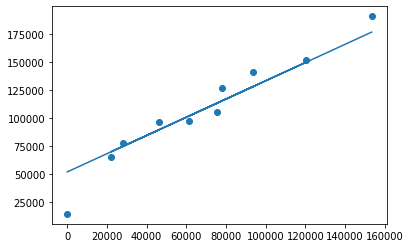

In [143]:
import matplotlib.pyplot as plt
plt.scatter(X_test[:, 1], y_test)
plt.plot(X_test[:, 1], y_pred)
plt.show()

In [146]:
from sklearn.metrics import mean_squared_error as mse
np.sqrt(mse(y_test, y_pred))


14391.990240910267

In [154]:
from sklearn.metrics import 
help(adjusted_rand_score)
#adjusted_rand_score(y_test, y_pred)

Help on function adjusted_rand_score in module sklearn.metrics.cluster.supervised:

adjusted_rand_score(labels_true, labels_pred)
    Rand index adjusted for chance.
    
    The Rand Index computes a similarity measure between two clusterings
    by considering all pairs of samples and counting pairs that are
    assigned in the same or different clusters in the predicted and
    true clusterings.
    
    The raw RI score is then "adjusted for chance" into the ARI score
    using the following scheme::
    
        ARI = (RI - Expected_RI) / (max(RI) - Expected_RI)
    
    The adjusted Rand index is thus ensured to have a value close to
    0.0 for random labeling independently of the number of clusters and
    samples and exactly 1.0 when the clusterings are identical (up to
    a permutation).
    
    ARI is a symmetric measure::
    
        adjusted_rand_score(a, b) == adjusted_rand_score(b, a)
    
    Read more in the :ref:`User Guide <adjusted_rand_score>`.
    
    Paramete